In [3]:
import pandas as pd
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'}, inplace=True)

In [15]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

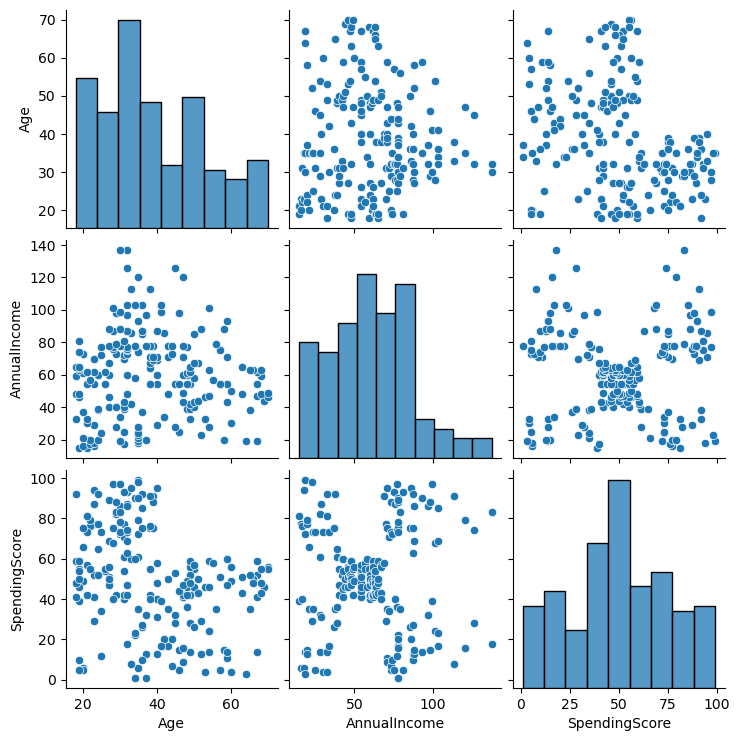

In [18]:
sns.pairplot(df[['Age','AnnualIncome','SpendingScore']])
plt.show()

Text(0.5, 1.0, 'AnnualIncome VS SpendingScore ')

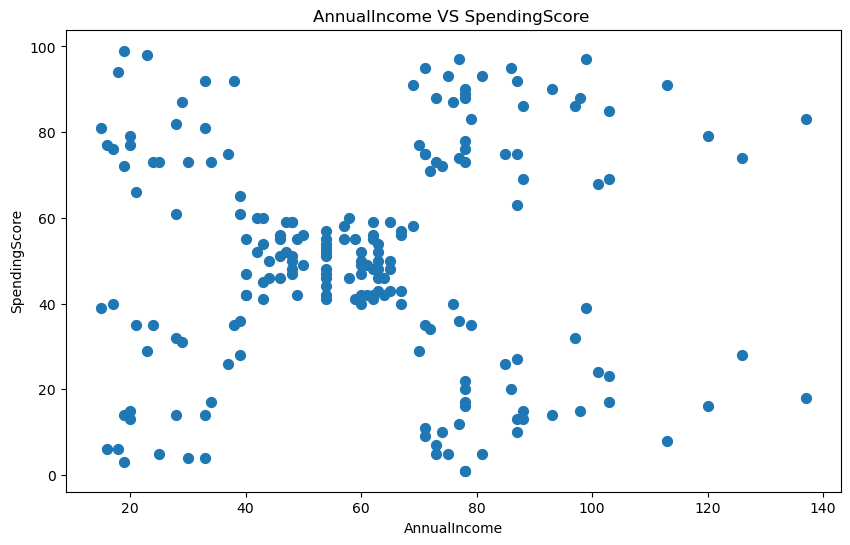

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(df['AnnualIncome'],df['SpendingScore'],s=50)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title('AnnualIncome VS SpendingScore ')

Elbow Method

In [28]:
from sklearn.cluster import KMeans

x = df[['AnnualIncome', 'SpendingScore']]

wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

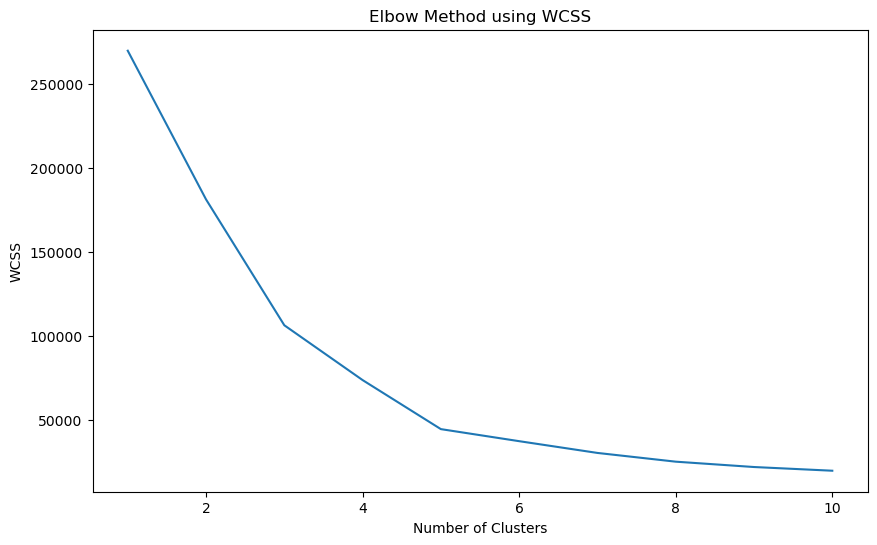

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method using WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
from sklearn.cluster import KMeans

X = df[['AnnualIncome', 'SpendingScore']]

# Applying KMeans
kmeans = KMeans(
    n_clusters=5,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=0
)

# Fitting and predicting clusters
y_kmeans = kmeans.fit_predict(X)

# Adding cluster labels to dataframe
df['Cluster'] = y_kmeans


In [40]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Clusture,Cluster
0,1,Male,19,15,39,<bound method _BaseKMeans.fit_predict of KMean...,3
1,2,Male,21,15,81,<bound method _BaseKMeans.fit_predict of KMean...,4
2,3,Female,20,16,6,<bound method _BaseKMeans.fit_predict of KMean...,3
3,4,Female,23,16,77,<bound method _BaseKMeans.fit_predict of KMean...,4
4,5,Female,31,17,40,<bound method _BaseKMeans.fit_predict of KMean...,3


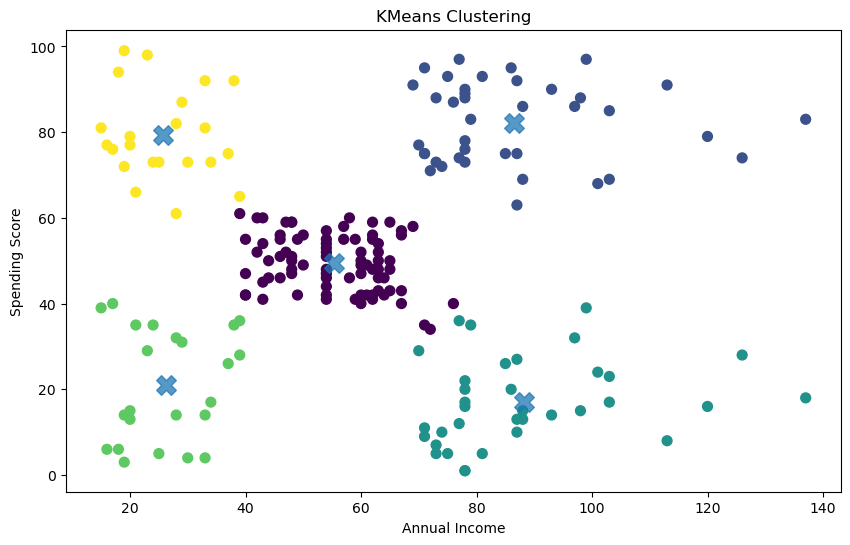

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    c=y_kmeans,
    s=50,
    cmap='viridis'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    alpha=0.75,
    marker='X'
)

plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()